In [2]:
from sympy import *
from scipy import linalg
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Definiendo un simbolo
x = symbols("x")

In [4]:
# Imprime la variable
x**2

x**2

In [5]:
# Mientras no se evalue la variable será impresa normalmente
sin(x)

sin(x)

In [6]:
# Se puede expresar de otras formas
y = x**2 + 4*x + 3
y

x**2 + 4*x + 3

In [7]:
z = y ** 2
z

(x**2 + 4*x + 3)**2

In [8]:
# Factoriza el polinomio
z.factor()

(x + 1)**2*(x + 3)**2

In [9]:
# Desgloza el polinomio
z.expand()

x**4 + 8*x**3 + 22*x**2 + 24*x + 9

In [10]:
# Para mirar que funciones se pueden aplicar a las variables unicamente se coloca z.
# Luego para solucionar una función, se utiliza la siguiente notación: 
solve(z,x) # Encuentra el valor donde f(x) = 0


[-3, -1]

In [11]:
solve(sin(x), x) #Encuetnra los valores para los cuales sin(x) = 0

[0, pi]

### Buena practica:
En ocasiones es buena idea definir la variable, diciendole al programa si es real o no de esta manera el programa puede realizar las soluciones de una manera más optima y rapida, acontinuación se muestra un ejemplo donde no esta definida y otro donde sí:

In [12]:
# Al no tener definido la x, asume que se puede solucionar a partir de numeros imaginarios
x = symbols("x")
solve(x**2+1,x)

[-I, I]

In [13]:
# Al indicarle que solo son números reales entonces no dará soluciones ya que no puede
x = symbols("x", real=True)
solve(x**2+1,x)

[]

Se pueden definir multiples variables al mismo tiempo

In [14]:
x, y, z = symbols('x y z')
F = x**2+sin(z)*y
F

x**2 + y*sin(z)

In [15]:
# Solucionando para x
x_sol = solve(F, x)
x_sol

[-sqrt(-y*sin(z)), sqrt(-y*sin(z))]

In [16]:
# Solucionando para y
ySol = solve(F, y)
ySol

[-x**2/sin(z)]

In [17]:
# Solucionando para z
zSol = solve(F,z)
zSol

[asin(x**2/y) + pi, -asin(x**2/y)]

Se puede conectar una expresión simbolica a una función numerica para mostrarse en un computador (matplotlib)

In [18]:
# Para convertir en una función numerica se usa lambdify, como se muestra acontinuacion:
expr = zSol[0] 
expr

asin(x**2/y) + pi

In [19]:
exprF = lambdify([x,y], expr) #lambdify([simbolos que hacen parte de la expresión simbolica], expresión simbolica)
exprF(1,2) #Toma los valores de x, y y evalua la función

np.float64(3.6651914291880923)

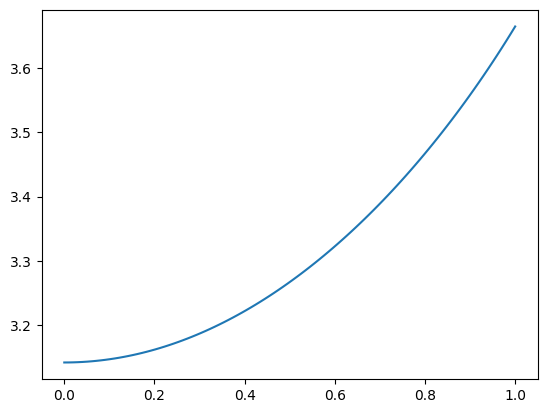

In [20]:
xNum = np.linspace(0,1,100)
yNum = 2
plt.plot(xNum, exprF(xNum,yNum))

In [22]:
F

x**2 + y*sin(z)

In [25]:
# Se pueden sustituir valores
F.subs([(y,cos(x)),(z,sin(y))])

x**2 + sin(sin(y))*cos(x)

In [32]:
# Calculando N
a, e, fi = symbols("a e fi", real=True)
N = a/sqrt(1-e**2*(sin(fi))**2)
N

a/sqrt(-e**2*sin(fi)**2 + 1)

In [38]:
# Para expresar fracciones
Rational (1,2) # Solo sirve con números

1/2

El uso de la función simpyfy es para simplificar las expresiones que se quieren mostrar

# Calculo 1 en Python

### Limites

In [41]:
x = symbols("x")
y = sin(x) + log(sin(x))
y

log(sin(x)) + sin(x)

In [45]:
limit(y, x, pi/2)

1

# Derivadas

En este caso, las derivadas se pueden aplicar a una sola variable, es la derivada de primer orden

In [47]:
# Realiza la derivada con respecto a un valor
diff(y,x)

cos(x) + cos(x)/sin(x)

In [54]:
x_i,x_j,y_i,y_j = symbols("x_i x_j y_i y_j")
p = tan((x_j-x_i)/(y_j-y_i))
p

tan((-x_i + x_j)/(-y_i + y_j))

In [60]:
diff(p,y_j).simplify()

(x_i - x_j)/((y_i - y_j)**2*cos((x_i - x_j)/(y_i - y_j))**2)

In [64]:
# Define funciones
f, g = symbols("f g", cls = Function)
g = g(x)
f = f(x+g)
f

f(x + g(x))

In [66]:
dfdx = diff(f,x)
dfdx

(Derivative(g(x), x) + 1)*Subs(Derivative(f(_xi_1), _xi_1), _xi_1, x + g(x))